# Descenso de Gradiente

Gonzalo Rodríguez Cañada

**Caso Práctico:**

Suponga que usted es un administrador de una universidad y quiere saber la posibilidad de admisión de cada solicitante en base a sus dos exámenes. Tienes datos históricos de candidatos anteriores que pueden ser usados como datos de entrenamiento para la regresión logística. La tarea es construir un modelo de clasificación que estime la probabilidad de admisión de cada solicitante en la universidad (Fuente:coursera machine learning class y Gondaliya (2013)).

Ahora, hemos comprendido el problema de clasificación que vamos a abordar. Entendamos los datos. En los datos tenemos los registros de la puntuación de los dos exámenes de los solicitantes anteriores y etiquetar si el solicitante obtuvo la admisión o no (1 - si obtuvo la admisión 0 - de lo contrario).

**Objetivo:**


**Fundamento teórico:**

El descenso de gradiente es un algoritmo de optimización utilizado para minimizar alguna función al moverse iterativamente en la dirección del descenso más pronunciado, definido por el negativo del gradiente. En el aprendizaje automático, utilizamos el descenso de gradiente para actualizar los parámetros de nuestro modelo. Los parámetros se refieren a los coeficientes en la Regresión Lineal y a los pesos en las redes neuronales.






In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

Introducimos los datos

In [16]:
path="../data/4_1_data.csv"
data = pd.read_csv(path)
data.head()

,score-1,score-2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Y vemos las dimensiones del dataset con el que trabajaremos.

In [3]:
data.shape #Observamos que son 100 filas y 3 columnas.

(100, 3)

 Y los visualizamos en un gráfico de dispersión donde el cero representa no haber sido admitidos y el 1 haber sido admitidos por la universidad.

Text(0.5, 1.0, 'Notas 1 y 2 en función del ser admitidos o no')

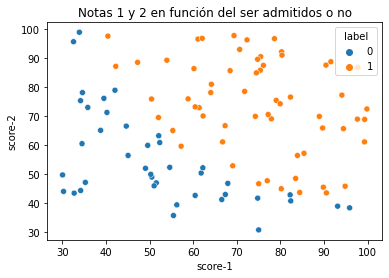

In [4]:
sns.scatterplot(x=data.iloc[:,0],
                y=data.iloc[:,1],
                hue= data.iloc[:,2])
plt.title('Notas 1 y 2 en función del ser admitidos o no')

In [5]:
notas = data[['score-1', 'score-2']].values #Creamos por un lado nuestra matriz de notas 
resultado = data['label'].values #Y creamos el vector de valores binarios
notas.shape,resultado.shape


((100, 2), (100,))

**1. Función Logistica**

Las funciones del sigmoide son una parte importante de un modelo de regresión logística. La regresión logística es una modificación de la regresión lineal para la clasificación de dos clases, y convierte una o más entradas de valor real en una probabilidad, como la probabilidad de que un cliente compre un producto. La etapa final de un modelo de regresión logística se suele fijar en la función logística, que permite que el modelo produzca una probabilidad.

In [17]:
def sigmoide(z):    
    return 1/ (1 + np.exp(-z))

**2. Función de coste**

En segundo lugar una definimos la función de coste asociada a una regresión logística o binaria, como es nuestro caso y adicionalmente establecemos el gradiente.

La función de coste es la siguiente:

![Imagen](https://carlosjuliopardoblog.files.wordpress.com/2017/12/41.png)

Y el gradiente es obtenido derivando esta misma 
![Imagen1](https://carlosjuliopardoblog.files.wordpress.com/2017/12/51.png)

La pendiente (o derivada) nos dice la inclinación o pendiente de la función de coste. Por lo tanto, para minimizar la función de costo, nos movemos en la dirección opuesta al gradiente. Los pasos a seguir son los siguientes.

   1.Inicializar los pesos theta al azar.
   2. Calcular los gradientes G de los parámetros de la función de coste. Esto se hace utilizando la diferenciación       parcial: G = ∂J(W)/∂W. El valor del gradiente G depende de las entradas, los valores actuales de los parámetros del     modelo y la función de coste. 
   3. Actualizamos los pesos por una cantidad proporcional a G, es decir, theta = theta - learning_rate*G
   4. Repitimos hasta que el costo J(theta) deje de reducirse, o se cumpla algún otro criterio de terminación     predefinido.

In [18]:
def f_cost(theta, x, y):
    m = len(y) #longitud de las observaciones
    y_hat = sigmoide(np.dot(x , theta))# En clasificación logística la ecuación es la siguiente y=sigmoide*teta representada como h(thehta)
    error = (-y * np.log(y_hat)) - ((1 - y) * np.log(1 - y_hat)) #Este es el error asociado que básicamente es la función de coste sin el término anterior al sumatorio
    coste = 1 / m * sum(error)#función de coste
    gradiente = 1 / m * np.dot(x.transpose(), (y_hat - y))#Derivamos la función de coste e introducimos la expresión mostrada anteriormente
    return coste[0] , gradiente

Para comprobar que la función de coste funciona, primero trabajaremos con los datos un poco.

In [19]:
media_notas = np.mean(notas, axis=0) #Medias de las notas
std_notas = np.std(notas, axis=0) #Desviación estandar de las notas
notas = (notas - media_notas) / std_notas #Hacemos una estandarización


In [20]:
filas = notas.shape[0] #indicamos las filas
columnas = notas.shape[1] #indicamos las columnas
filas,columnas

(100, 2)

In [21]:
X = np.append(np.ones((filas, 1)), notas, axis=1) #Unimos a las notas una matriz de la longitud de 100 de todos unos 
y = resultado.reshape(filas, 1)#Ponemos en forma matricial nuestras variable binaria correspondiente a si han sido o no admitidos

theta_init = np.zeros((columnas + 1, 1))#indicamos los parámetros iniciales de theta

f_coste, gradiente = f_cost(theta_init, X, y) #realizamos una asignación múltiple donde el resultado de la función de coste es asignado a los parámetros que asignamos



Una vez  trabajado todo un poco, hacemos una comprobación de las condiciones inicial

In [22]:
print( f_coste)#Comprobamos el valor de función de coste en las condiciones iniciales
print(gradiente)#Gradiente en las condiciones iniciales

0.693147180559946
[[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


Inicializamos la función correspondiente al descenso de gradiente que depende principalmente de nuestros valores de learning rate( longitud de nuestros pasos de avance) y iteraciones que en este caso será el parámetro que usamos de parada.

In [23]:
def descenso_gradiente(x, y, theta, lr_rate, iteraciones):
    costes = [] #Creamos una lista vacía que guardará los valores de la función de gasto y su descenso
    for i in range(iteraciones): #comenzamos a iterar
        cost, gradiente = f_cost(theta, x, y)#hacemos la función de costo
        theta = theta-(lr_rate * gradiente)#cambiamos la theta según iteramos, la nueva theta será la vieja menos el descenso del gradiente por el learning rate.
        costes.append(cost)#añadimos el valor de la función de coste según descendemos
    return theta, costes

In [24]:
#Decimos que nuestro learning rate es de 0.5 y 700 iteraciones y realizamos el descenso.

theta, costes = descenso_gradiente(X, y, theta_init,0.5, 700)

print( theta)#Theta al final de las iteraciones
print( costes[-1])#Última función de coste

[[1.63769371]
 [3.82069848]
 [3.55863308]]
0.20369102731042496


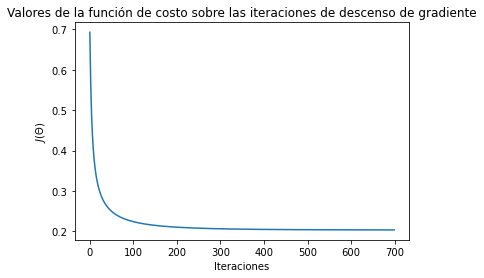

In [25]:
plt.plot(costes)
plt.xlabel("Iteraciones")
plt.ylabel("$J(\Theta)$")
plt.title("Valores de la función de costo sobre las iteraciones de descenso de gradiente");

Se observa como hay una convergencia de la función de coste alrededor de las **400 iteraciones.**

 ## References:

https://deepai.org/machine-learning-glossary-and-terms/sigmoid-function

https://carlosjuliopardoblog.wordpress.com/2017/12/31/regresion-logistica/

https://github.com/lmntrixsid/Linear-and-Logistic-Regression-with-NumPy-and-Python/blob/master/Logistic_Regression_Completed.ipynb

https://www.freecodecamp.org/news/understanding-gradient-descent-the-most-popular-ml-algorithm-a66c0d97307f/

https://www.kaggle.com/aasimohyeah/linear-regression-gradient-descent-on-iris-dataset